In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Knowing the dataset
At first, no cleaning will be applied to the dataset, later we will apply all cleaning and make a new EDA

In [2]:
#Import dataset
df = pd.read_csv('base_suja/base_unificada_suja.csv')
variaveis = [
    'data_evento', 'ano_evento', 'TIPOBITO', 'evento_MUNNOMEX',
    'res_MUNNOMEX', 'evento_CAPITAL', 'res_CAPITAL', 'evento_REGIAO',
    'res_REGIAO', 'evento_SIGLA_UF', 'res_SIGLA_UF', 'IDADEMAE',
    'idademae_faixa', 'ESCMAE2010', 'escolaridade_mae', 'OBITOGRAV',
    'GRAVIDEZ', 'tipo_gravidez', 'SEMAGESTAC', 'idade_gestacao_faixa',
    'SEXO', 'def_sexo', 'PESO', 'peso_faixa', 'OBITOPARTO',
    'def_obito_parto', 'CAUSABAS', 'causabas_capitulo',
    'causabas_categoria', 'causabas_grupo', 'causabas_subcategoria',
    'FLAG_BASE', 'sum_CENTROBS', 'sum_QTINST34', 'sum_QTINST35',
    'sum_QTINST36', 'sum_QTINST37', 'sum_QTLEIT34', 'sum_QTLEIT38',
    'sum_QTLEIT39', 'sum_QTLEIT40', 'sum_CENTRNEO','TP_UNID_5', 'TP_UNID_7',
    'TP_UNID_15', 'TP_UNID_36', 'TP_UNID_61'
]
df = df[variaveis]

<ipython-input-2-5c667751b380>:2: DtypeWarning: Columns (25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('base_suja/base_unificada_suja.csv')


In [3]:
# Configuration to show more rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [4]:
url_dicionario = 'https://docs.google.com/spreadsheets/d/1QFy_F2o81ULglNx8knNqg6oI7v3RARaUAaLLwOQr7K4/edit?usp=sharing'
f"""The dataset has {len(df)} lines and {len(df.columns)} columns. More details can be consulted in the dictionary {url_dicionario}. Below the type of variables and the 'face' from the dataset"""

"The dataset has 10933131 lines and 47 columns. More details can be consulted in the dictionary https://docs.google.com/spreadsheets/d/1QFy_F2o81ULglNx8knNqg6oI7v3RARaUAaLLwOQr7K4/edit?usp=sharing. Below the type of variables and the 'face' from the dataset"

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10933131 entries, 0 to 10933130
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   data_evento            object 
 1   ano_evento             int64  
 2   TIPOBITO               float64
 3   evento_MUNNOMEX        object 
 4   res_MUNNOMEX           object 
 5   evento_CAPITAL         object 
 6   res_CAPITAL            object 
 7   evento_REGIAO          object 
 8   res_REGIAO             object 
 9   evento_SIGLA_UF        object 
 10  res_SIGLA_UF           object 
 11  IDADEMAE               float64
 12  idademae_faixa         object 
 13  ESCMAE2010             float64
 14  escolaridade_mae       object 
 15  OBITOGRAV              float64
 16  GRAVIDEZ               float64
 17  tipo_gravidez          object 
 18  SEMAGESTAC             float64
 19  idade_gestacao_faixa   object 
 20  SEXO                   int64  
 21  def_sexo               object 
 22  PESO            

In [6]:
df.head()

,data_evento,ano_evento,TIPOBITO,evento_MUNNOMEX,res_MUNNOMEX,evento_CAPITAL,res_CAPITAL,evento_REGIAO,res_REGIAO,evento_SIGLA_UF,res_SIGLA_UF,IDADEMAE,idademae_faixa,ESCMAE2010,escolaridade_mae,OBITOGRAV,GRAVIDEZ,tipo_gravidez,SEMAGESTAC,idade_gestacao_faixa,SEXO,def_sexo,PESO,peso_faixa,OBITOPARTO,def_obito_parto,CAUSABAS,causabas_capitulo,causabas_categoria,causabas_grupo,causabas_subcategoria,FLAG_BASE,sum_CENTROBS,sum_QTINST34,sum_QTINST35,sum_QTINST36,sum_QTINST37,sum_QTLEIT34,sum_QTLEIT38,sum_QTLEIT39,sum_QTLEIT40,sum_CENTRNEO,TP_UNID_5,TP_UNID_7,TP_UNID_15,TP_UNID_36,TP_UNID_61
0,2019-01-30,2019,1.0,CATU,ENTRE RIOS,N,N,Nordeste,Nordeste,BA,BA,26.0,entre_20_34,3.0,Ensino_medio,NaN,1.0,Unica,29.0,entre_28_36,1,Masculino,1440.0,entre_500_1499,1.0,Antes,P020,XVI. Algumas afec originadas no período perinatal,P02 Fet rec-nasc afet compl plac cord umb membr,"Fet rec-nasc afet fat mat e compl grav, trab p...",P02.0 Fet rec-nasc afetados p/placenta previa,SIM_DOFET,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
1,2019-01-24,2019,1.0,JUAZEIRO DO NORTE,JUAZEIRO DO NORTE,N,N,Nordeste,Nordeste,CE,CE,19.0,menor_igual_19,9.0,Ignorado,NaN,1.0,Unica,32.0,entre_28_36,1,Masculino,1314.0,entre_500_1499,1.0,Antes,P95,XVI. Algumas afec originadas no período perinatal,P95 Morte fetal de causa NE,Outros transtornos originados no período perin...,P95 Morte fetal de causa NE,SIM_DOFET,4.0,6.0,5.0,2.0,6.0,14.0,13.0,27.0,54.0,4.0,5.0,1.0,0.0,92.0,0.0
2,2019-01-29,2019,1.0,LORENA,POTIM,N,N,Sudeste,Sudeste,SP,SP,NaN,Ignorado,NaN,Ignorado,NaN,1.0,Unica,25.0,entre_22_27,0,Ignorado,705.0,entre_500_1499,1.0,Antes,P209,XVI. Algumas afec originadas no período perinatal,P20 Hipoxia intra-uterina,Transt respirat e cardiovasc específ per perin...,P20.9 Hipoxia intra-uterina NE,SIM_DOFET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2019-01-25,2019,1.0,PARNAIBA,AGUA DOCE DO MARANHAO,N,N,Nordeste,Nordeste,PI,MA,21.0,entre_20_34,2.0,Fundamental,NaN,1.0,Unica,27.0,entre_22_27,1,Masculino,955.0,entre_500_1499,1.0,Antes,P392,XVI. Algumas afec originadas no período perinatal,P39 Outr infecc especificas do periodo perin...,Infecções específicas do período perinatal,P39.2 Infecc intra-amniotica do feto NCOP,SIM_DOFET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2019-02-14,2019,1.0,CAMACARI,CAMACARI,N,N,Nordeste,Nordeste,BA,BA,39.0,entre_35_39,9.0,Ignorado,NaN,1.0,Unica,36.0,entre_28_36,1,Masculino,1960.0,entre_1500_2499,1.0,Antes,P200,XVI. Algumas afec originadas no período perinatal,P20 Hipoxia intra-uterina,Transt respirat e cardiovasc específ per perin...,P20.0 Hipoxia intra-uter diagn ant inic trab p...,SIM_DOFET,3.0,3.0,2.0,2.0,7.0,6.0,8.0,5.0,42.0,2.0,5.0,1.0,2.0,81.0,0.0


#  Checking data quality

### Duplicates

In [7]:
# Duplicate data 
duplicados = df.duplicated()
soma = duplicados.sum()
f"""The dataset has {soma} duplicate rows, which represents {round((soma/len(df)) * 100, 2)} %"""

'The dataset has 3015 duplicate rows, which represents 0.03 %'

In [8]:
# Frequency of duplicates by FLAG_BASE, res_SIGLA_UF and ano_evento
df_duplicados = df[duplicados]
df_duplicados.value_counts(['FLAG_BASE', 'ano_evento', 'res_SIGLA_UF'])

# There is no concentration of missing items that indicates a structural problem with filling in the data, whether by year or 
# UF of residence

FLAG_BASE  ano_evento  res_SIGLA_UF
SINASC     2019        SP              292
           2020        SP              271
           2021        SP              226
           2022        SP              220
           2019        RJ               73
           2022        RJ               71
           2021        RJ               68
           2020        RJ               64
           2019        MG               52
           2020        MG               51
           2021        MG               47
           2022        MG               41
           2021        CE               40
                       MA               36
           2019        AL               35
           2021        PE               34
                       BA               34
                       PA               33
           2020        BA               33
                       PE               33
           2019        AM               32
           2020        PA               32
           2019   

### Missing

In [9]:
# Counting missing values
df_sim_dofet = df[df['FLAG_BASE']=='SIM_DOFET']
missing_count_sim_dofet = df_sim_dofet.isnull().sum()  # counts the null values in each column
missing_percent_sim_dofet = round((missing_count_sim_dofet / len(df_sim_dofet)) * 100,2)  # calculates the percentage of null values
missing_data_sim_dofet = pd.DataFrame({'Missing Count': missing_count_sim_dofet, 'Missing Percentage': missing_percent_sim_dofet})
missing_data_sim_dofet.index.name = 'Variable'  # sets the index name to 'Variable'
missing_data_sim_dofet.reset_index(inplace=True)  # resets the index to make 'Variable' a column
missing_data_sim_dofet['BASE'] = 'SIM_DOFET'

df_sinasc = df[df['FLAG_BASE']=='SINASC']
missing_count_sinasc = df_sinasc.isnull().sum()  # counts the null values in each column
missing_percent_sinasc = round((missing_count_sinasc / len(df_sinasc)) * 100,2)  # calculates the percentage of null values
missing_data_sinasc = pd.DataFrame({'Missing Count': missing_count_sinasc, 'Missing Percentage': missing_percent_sinasc})
missing_data_sinasc.index.name = 'Variable'  # sets the index name to 'Variable'
missing_data_sinasc.reset_index(inplace=True)  # resets the index to make 'Variable' a column
missing_data_sinasc['BASE'] = 'SINASC'

# appending
missing_data = pd.concat([missing_data_sim_dofet, missing_data_sinasc])

# Sorting the DataFrame by the highest missing frequencies
missing_data_sorted = missing_data.sort_values(by=['BASE', 'Missing Count'], ascending=False)

missing_data_sorted[missing_data_sorted['Missing Percentage'] > 0]

# Some variables are not filled in the sinasc dataset. For EDA it will be used in SIM_DOFET, but in the model it will not be removed
# 'OBITOGRAV' no padding at the base
# Missing points for other variables will be removed, keeping the variables in the study

,Variable,Missing Count,Missing Percentage,BASE
2,TIPOBITO,10818314,100.00,SINASC
15,OBITOGRAV,10818314,100.00,SINASC
24,OBITOPARTO,10818314,100.00,SINASC
25,def_obito_parto,10818314,100.00,SINASC
26,CAUSABAS,10818314,100.00,SINASC
27,causabas_capitulo,10818314,100.00,SINASC
28,causabas_categoria,10818314,100.00,SINASC
29,causabas_grupo,10818314,100.00,SINASC
30,causabas_subcategoria,10818314,100.00,SINASC
13,ESCMAE2010,144566,1.34,SINASC


In [10]:
del missing_data_sorted, missing_data, df_sim_dofet, df_sinasc

In [11]:
# Checking if there is any pattern in the missing data looking at year and 'res_SIGLA_UF'
lista = ['ESCMAE2010', 'SEMAGESTAC', 'PESO', 'IDADEMAE']
for i in lista:
    print(f"""Variável {i}\n\n{df.loc[df[i].isnull(), ['FLAG_BASE', 'ano_evento', 'res_SIGLA_UF']].value_counts()}""")

# Some UF's have very high values, but compared to the total UF it is less than 10%
# len(df.loc[(df['res_SIGLA_UF']=='CE') & (df['ano_evento']==2021) & (df['FLAG_BASE']=='SINASC')])

Variável ESCMAE2010

FLAG_BASE  ano_evento  res_SIGLA_UF
SINASC     2021        MA              9096
                       BA              9023
           2019        CE              8866
           2021        CE              8457
           2020        MA              8022
                       CE              7236
           2019        BA              6944
                       AL              6530
           2020        BA              5882
           2022        CE              5725
                       BA              5703
           2019        PA              4521
           2022        PA              3989
           2021        PA              3266
           2020        MG              2878
                       PA              2757
           2019        MG              2724
           2022        MA              2534
           2019        MA              2108
                       SC              1885
           2021        SC              1787
           2022    

Variável SEMAGESTAC

FLAG_BASE  ano_evento  res_SIGLA_UF
SINASC     2020        PA              7245
           2021        PA              6261
           2019        BA              6130
                       PA              5721
           2021        BA              5159
           2020        BA              5010
           2019        CE              4765
           2022        BA              3797
           2021        CE              3372
           2019        MA              3297
           2021        RJ              3202
           2019        PE              3174
           2022        PA              3146
           2020        CE              3096
                       MA              2918
                       RJ              2842
           2021        MA              2741
           2020        PE              2676
           2019        MG              2383
           2022        MA              2363
           2019        RJ              2311
           2022    

### Ignorado

In [38]:
df_ignorado = df.loc[(df['ESCMAE2010']==9) | (df['GRAVIDEZ']==9) |
                     (df['idade_gestacao_faixa']=='Ignorado') | (df['SEXO']==0)]
df_ignorado['FLAG_BASE'].value_counts()

SINASC       259723
SIM_DOFET     20127
Name: FLAG_BASE, dtype: int64

### Categorical variables

In [12]:
lista_cat = [
'ano_evento'
, 'TIPOBITO'       
, 'evento_MUNNOMEX'
, 'res_MUNNOMEX'
, 'evento_CAPITAL'
, 'res_CAPITAL'
, 'evento_REGIAO'
, 'res_REGIAO'
, 'evento_SIGLA_UF'
, 'res_SIGLA_UF'
, 'idademae_faixa'
, 'ESCMAE2010'
, 'escolaridade_mae'
, 'OBITOGRAV'
, 'GRAVIDEZ'
, 'tipo_gravidez'
, 'idade_gestacao_faixa'
, 'SEXO'
, 'def_sexo'
, 'peso_faixa'
, 'OBITOPARTO'
, 'def_obito_parto'
, 'CAUSABAS'
, 'causabas_capitulo'
, 'causabas_categoria'
, 'causabas_grupo'
, 'causabas_subcategoria'
, 'FLAG_BASE'
            ]
for col in lista_cat:
    print(f'\nPercentual de valores únicos para {col}:')
    print(round((df[col].value_counts()/len(df)) * 100, 2))


Percentual de valores únicos para ano_evento:
2019    26.33
2020    25.24
2021    24.75
2022    23.68
Name: ano_evento, dtype: float64

Percentual de valores únicos para TIPOBITO:
1.0    1.05
Name: TIPOBITO, dtype: float64

Percentual de valores únicos para evento_MUNNOMEX:
SAO PAULO                           5.95
RIO DE JANEIRO                      2.82
BRASILIA                            1.92
RECIFE                              1.80
BELO HORIZONTE                      1.64
FORTALEZA                           1.53
MANAUS                              1.47
SALVADOR                            1.44
GOIANIA                             1.24
CURITIBA                            1.08
BELEM                               0.95
PORTO ALEGRE                        0.92
SAO LUIS                            0.80
MACEIO                              0.79
ARACAJU                             0.74
TERESINA                            0.73
CAMPINAS                            0.70
JOAO PESSOA                

SAO PAULO                           5.31
RIO DE JANEIRO                      2.62
BRASILIA                            1.44
MANAUS                              1.36
FORTALEZA                           1.19
SALVADOR                            1.10
BELO HORIZONTE                      0.96
CURITIBA                            0.72
GOIANIA                             0.71
RECIFE                              0.70
GUARULHOS                           0.70
BELEM                               0.64
PORTO ALEGRE                        0.55
SAO LUIS                            0.54
MACEIO                              0.51
CAMPINAS                            0.49
CAMPO GRANDE                        0.49
TERESINA                            0.46
DUQUE DE CAXIAS                     0.43
JOAO PESSOA                         0.42
NOVA IGUACU                         0.40
NATAL                               0.38
CUIABA                              0.36
SAO GONCALO                         0.36
FEIRA DE SANTANA

Sudeste         38.29
Nordeste        28.25
Sul             13.68
Norte           11.23
Centro-Oeste     8.55
Name: res_REGIAO, dtype: float64

Percentual de valores únicos para evento_SIGLA_UF:
SP    20.11
MG     9.05
RJ     7.20
BA     6.82
PR     5.37
PA     4.89
PE     4.73
RS     4.71
CE     4.47
MA     3.87
SC     3.59
GO     2.95
AM     2.80
MT     2.14
PB     2.04
ES     1.95
DF     1.92
AL     1.78
PI     1.77
RN     1.60
MS     1.54
SE     1.19
RO     0.95
TO     0.86
AC     0.60
AP     0.60
RR     0.51
Name: evento_SIGLA_UF, dtype: float64

Percentual de valores únicos para res_SIGLA_UF:
SP    20.06
MG     9.07
RJ     7.20
BA     6.92
PR     5.37
PA     4.97
RS     4.71
PE     4.68
CE     4.47
MA     3.95
SC     3.60
GO     3.42
AM     2.82
MT     2.14
PB     2.04
ES     1.97
AL     1.78
PI     1.68
RN     1.58
MS     1.55
DF     1.44
SE     1.15
RO     0.95
TO     0.87
AC     0.57
AP     0.54
RR     0.51
Name: res_SIGLA_UF, dtype: float64

Percentual de valores únicos para 

Fet rec-nasc afet fat mat e compl grav, trab parto    0.47
Outros transtornos originados no período perinatal    0.24
Transt respirat e cardiovasc específ per perinatal    0.20
Outras malformações congênitas                        0.03
Transt endócr e metaból trans espec fet e rec-nasc    0.02
Infecções de transmissão predominantemente sexual     0.02
Transt relac com a duração gestação e cresc fetal     0.02
Malformações congênitas do sistema nervoso            0.01
Anomalias cromossômicas NCOP                          0.01
Malformações congênitas do aparelho circulatório      0.01
Afecç comprom tegument e reg térm fet e recém-nasc    0.01
Transt hemorrág e hematológ feto e recém-nascido      0.01
Malform e deform congênit do sistema osteomuscular    0.00
Infecções específicas do período perinatal            0.00
Malformações congênitas do aparelho urinário          0.00
Malformações congênitas do aparelho respiratório      0.00
Outras malformações congênitas aparelho digestivo     0.

### Numerical variables

In [13]:
# Basic Statistics for Numeric Variables
lista_numerica = [
'IDADEMAE'
, 'SEMAGESTAC'
, 'PESO'
, 'sum_CENTROBS'
, 'sum_QTINST34'
, 'sum_QTINST35'
, 'sum_QTINST36'
, 'sum_QTINST37'
, 'sum_QTLEIT34'
, 'sum_QTLEIT38'
, 'sum_QTLEIT39'
, 'sum_QTLEIT40'
, 'sum_CENTRNEO'
, 'TP_UNID_5'
, 'TP_UNID_7'
, 'TP_UNID_15'
, 'TP_UNID_36'
, 'TP_UNID_61'
]
estatisticas_numericas = df[lista_numerica].describe()
estatisticas_numericas

,IDADEMAE,SEMAGESTAC,PESO,sum_CENTROBS,sum_QTINST34,sum_QTINST35,sum_QTINST36,sum_QTINST37,sum_QTLEIT34,sum_QTLEIT38,sum_QTLEIT39,sum_QTLEIT40,sum_CENTRNEO,TP_UNID_5,TP_UNID_7,TP_UNID_15,TP_UNID_36,TP_UNID_61
count,1.092541e+07,1.079908e+07,1.092407e+07,1.093197e+07,1.093197e+07,1.093197e+07,1.093197e+07,1.093197e+07,1.093197e+07,1.093197e+07,1.093197e+07,1.093197e+07,1.093197e+07,1.093197e+07,1.093197e+07,1.093197e+07,1.093197e+07,1.093197e+07
mean,2.728609e+01,3.835050e+01,3.162914e+03,8.582581e+00,1.239245e+01,1.487744e+01,2.640881e+00,1.290866e+01,2.853600e+01,3.046793e+01,4.367069e+01,1.238504e+02,6.083302e+00,1.760514e+01,8.220696e+00,3.268998e-01,3.622706e+02,1.726143e-01
std,6.775033e+00,2.571949e+00,5.900525e+02,1.740805e+01,2.814640e+01,3.311985e+01,4.266934e+00,2.848656e+01,6.117955e+01,7.757867e+01,1.112579e+02,2.768565e+02,1.307289e+01,3.783873e+01,1.687064e+01,9.429520e-01,8.314733e+02,5.244133e-01
min,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.200000e+01,3.800000e+01,2.890000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
50%,2.700000e+01,3.900000e+01,3.210000e+03,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01,0.000000e+00
75%,3.200000e+01,4.000000e+01,3.520000e+03,6.000000e+00,8.000000e+00,9.000000e+00,3.000000e+00,8.000000e+00,1.900000e+01,1.300000e+01,1.700000e+01,8.100000e+01,4.000000e+00,1.200000e+01,4.000000e+00,0.000000e+00,1.870000e+02,0.000000e+00
max,9.900000e+01,9.900000e+01,7.000000e+03,8.100000e+01,1.300000e+02,1.620000e+02,2.100000e+01,1.390000e+02,2.850000e+02,3.740000e+02,4.920000e+02,1.312000e+03,5.800000e+01,1.610000e+02,7.100000e+01,9.000000e+00,4.586000e+03,2.000000e+00


### Outlier

In [14]:
def detectar_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = col[(col < lower_bound) | (col > upper_bound)]
    return outliers

outliers_numericos = df[lista_numerica].apply(detectar_outliers)

for i in lista_numerica:
    print(outliers_numericos.loc[~outliers_numericos[i].isna(), [i]].describe())

          IDADEMAE
count  3917.000000
mean     52.998979
std      11.610419
min      48.000000
25%      48.000000
50%      49.000000
75%      52.000000
max      99.000000
          SEMAGESTAC
count  602805.000000
mean       31.780576
std         6.077474
min         0.000000
25%        30.000000
50%        33.000000
75%        34.000000
max        99.000000
                PESO
count  448744.000000
mean     1838.983456
std      1329.292409
min         0.000000
25%      1005.000000
50%      1545.000000
75%      1860.000000
max      7000.000000
       sum_CENTROBS
count  1.767998e+06
mean   3.998114e+01
std    2.571174e+01
min    1.400000e+01
25%    1.900000e+01
50%    2.700000e+01
75%    7.300000e+01
max    8.100000e+01
       sum_QTINST34
count  1.708000e+06
mean   6.305682e+01
std    4.420609e+01
min    1.900000e+01
25%    2.500000e+01
50%    4.000000e+01
75%    1.220000e+02
max    1.300000e+02
       sum_QTINST35
count  1.717483e+06
mean   7.632867e+01
std    4.905419e+01
min    2.20

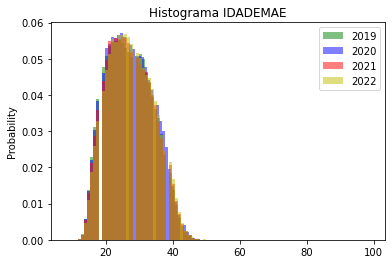

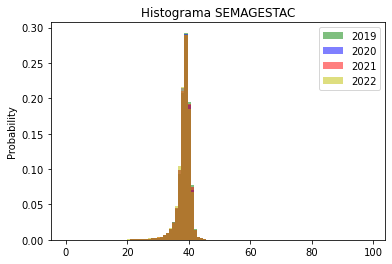

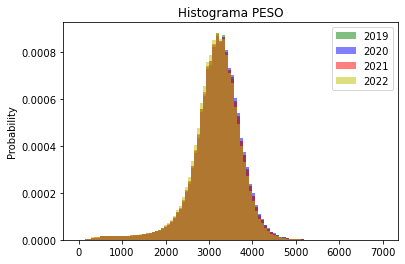

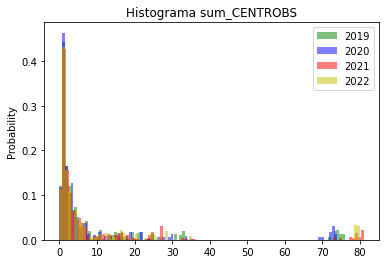

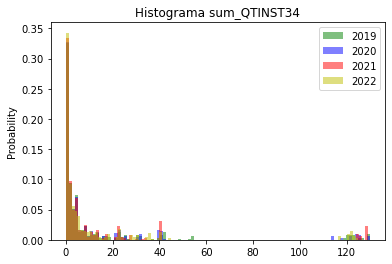

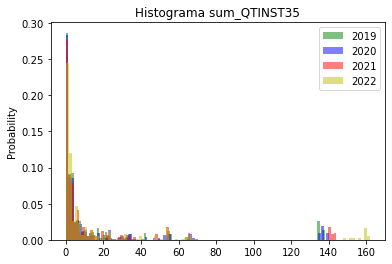

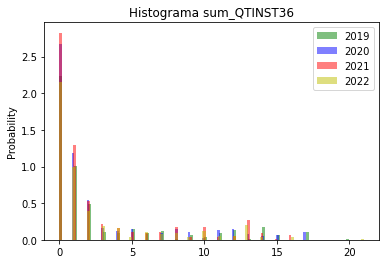

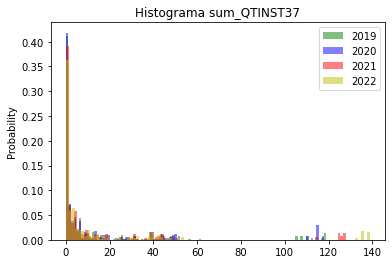

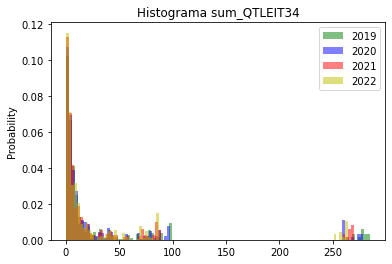

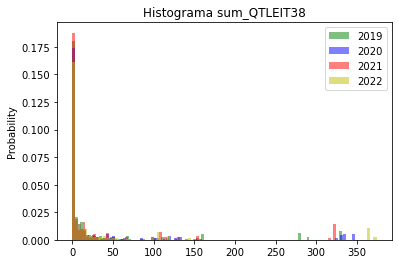

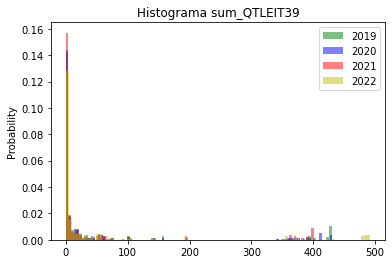

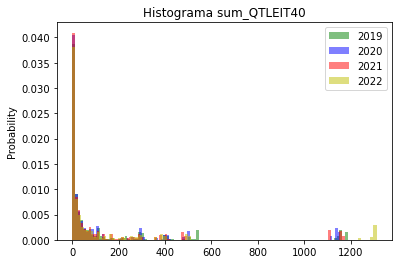

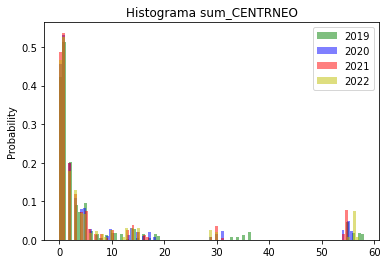

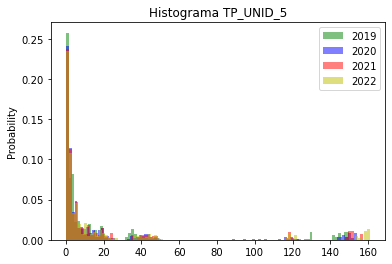

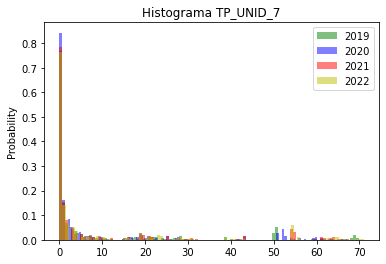

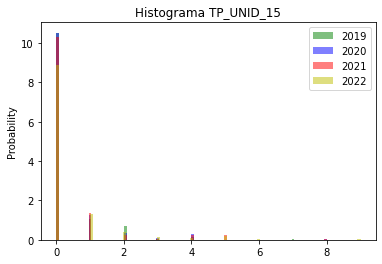

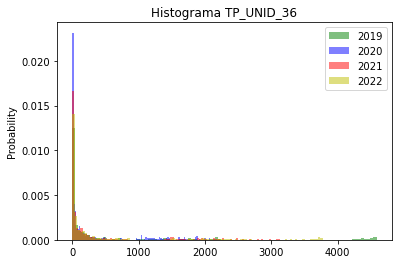

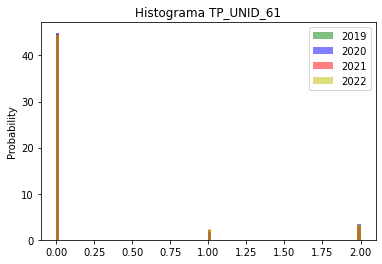

In [15]:
for i in lista_numerica:
    x1 = df.loc[df['ano_evento'] == 2019, i]
    x2 = df.loc[df['ano_evento'] == 2020, i]
    x3 = df.loc[df['ano_evento'] == 2021, i]
    x4 = df.loc[df['ano_evento'] == 2022, i]

    # Normalize
    kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)

    # Plot
    plt.figure()  # Creates a new figure for each iteration
    plt.hist(x1, **kwargs, color='g', label='2019')
    plt.hist(x2, **kwargs, color='b', label='2020')
    plt.hist(x3, **kwargs, color='r', label='2021')
    plt.hist(x4, **kwargs, color='y', label='2022')
    plt.gca().set(title=f'Histograma {i}', ylabel='Probability')
    # plt.xlim(50, 75)
    plt.legend()

    # Show or save the figure here if needed
    # plt.savefig(f'histograma_{i}.png')

    plt.show()  # Show the graph

### Cause of death

In [16]:
contingency_table = pd.crosstab(index=df['CAUSABAS'], columns=df['ano_evento'])#, normalize='index')
contingency_table = contingency_table.reset_index()
contingency_table.loc[contingency_table['CAUSABAS'].isin(['P200', 'P95'])]

ano_evento,CAUSABAS,2019,2020,2021,2022
73,P200,2674,1842,1712,1843
138,P95,6172,6634,6701,5793


### Births by municipality per year

In [17]:
df_sinasc = df.loc[df['FLAG_BASE']=='SINASC']
pd.crosstab(index=df_sinasc['evento_MUNNOMEX'], columns=df_sinasc['ano_evento'])

ano_evento,2019,2020,2021,2022
evento_MUNNOMEX,,,,
ABADIA DE GOIAS,5,5,2,6
ABADIA DOS DOURADOS,2,0,1,0
ABADIANIA,3,5,5,9
ABAETE,196,203,164,160
ABAETETUBA,2133,2480,2861,2836
ABAIARA,1,2,5,5
ABAIRA,4,3,3,4
ABARE,96,115,107,88
ABATIA,2,0,1,0


# Cleaning the dataset

In [18]:
# Removing columns with a high frequency of missings

#df_limpo = df_limpo.drop(columns=['OBITOGRAV', 'causabas_categoria', 'TIPOBITO', 'causabas_capitulo', 'CAUSABAS'
#                                  , 'def_obito_parto', 'OBITOPARTO', 'causabas_subcategoria', 'causabas_grupo'])

In [19]:
# Removing duplicates
tam_inicial = len(df)
df_limpo = df.drop_duplicates()
tam_depois=len(df_limpo)
print(f'Remove duplicates {tam_inicial - tam_depois} rows')

Remove duplicates 3015 rows


In [20]:
#Input base SIM_DOFET
tam_antes = len(df_limpo)
df_limpo_sim = df_limpo.loc[df_limpo['FLAG_BASE']=='SIM_DOFET'].reset_index(drop=True)
moda_escmae2010 = pd.DataFrame(df_limpo_sim['ESCMAE2010'].value_counts()).index[0]
mediana_idademae = round(np.nanmedian(df_limpo_sim['IDADEMAE']), 0)
mediana_peso = np.nanmedian(df_limpo_sim['PESO'])
mediana_semanagesta = round(np.nanmedian(df_limpo_sim['SEMAGESTAC']), 0)

df_limpo_sim['ESCMAE2010'] = np.where(df_limpo_sim['ESCMAE2010'].isnull(), moda_escmae2010, df_limpo_sim['ESCMAE2010'])
df_limpo_sim['IDADEMAE'] = np.where(df_limpo_sim['IDADEMAE'].isnull(), mediana_idademae, df_limpo_sim['IDADEMAE'])
df_limpo_sim['PESO'] = np.where(df_limpo_sim['PESO'].isnull(), mediana_peso, df_limpo_sim['PESO'])
df_limpo_sim['SEMAGESTAC'] = np.where(df_limpo_sim['SEMAGESTAC'].isnull(), mediana_semanagesta, df_limpo_sim['SEMAGESTAC'])
df_limpo_sim = df_limpo_sim.reset_index(drop=True)

In [23]:
# Removendo os missing
df_limpo_sinasc = df_limpo.loc[df_limpo['FLAG_BASE']!='SIM_DOFET']
df_limpo_sinasc = df_limpo_sinasc.reset_index(drop=True)


lista_missing_sim = [
    'ESCMAE2010','SEMAGESTAC','PESO','IDADEMAE','sum_CENTROBS','sum_QTINST34','sum_QTINST35','sum_QTINST36','sum_QTINST37'
    ,'sum_QTLEIT34','sum_QTLEIT38','sum_QTLEIT39','sum_QTLEIT40','sum_CENTRNEO','TP_UNID_5'
    ,'TP_UNID_7','TP_UNID_15','TP_UNID_36','TP_UNID_61', 'GRAVIDEZ', 'res_MUNNOMEX', 'res_CAPITAL', 'res_SIGLA_UF'
    , 'evento_MUNNOMEX', 'evento_CAPITAL', 'evento_REGIAO', 'evento_SIGLA_UF', 'causabas_capitulo', 'causabas_categoria'
    , 'causabas_grupo', 'causabas_subcategoria'
]

lista_missing_sinasc = [
    'ESCMAE2010','SEMAGESTAC','PESO','IDADEMAE','sum_CENTROBS','sum_QTINST34','sum_QTINST35','sum_QTINST36','sum_QTINST37'
    ,'sum_QTLEIT34','sum_QTLEIT38','sum_QTLEIT39','sum_QTLEIT40','sum_CENTRNEO','TP_UNID_5'
    ,'TP_UNID_7','TP_UNID_15','TP_UNID_36','TP_UNID_61', 'GRAVIDEZ', 'res_MUNNOMEX', 'res_CAPITAL', 'res_SIGLA_UF'
    , 'evento_MUNNOMEX', 'evento_CAPITAL', 'evento_REGIAO', 'evento_SIGLA_UF'
]
df_limpo_sim = df_limpo_sim.dropna(subset = lista_missing_sim)
df_limpo_sinasc = df_limpo_sinasc.dropna(subset = lista_missing_sinasc)
df_limpo = pd.concat([df_limpo_sim, df_limpo_sinasc])
df_limpo = df_limpo.reset_index(drop=True)
tam_depois=len(df_limpo)
print(f'Remove missing {tam_antes - tam_depois} rows')

Remove missing 263723 rows


In [24]:
# Remove ignored class
tam_antes = len(df_limpo)
df_limpo['evento_MUNNOMEX'] = df_limpo['evento_MUNNOMEX'].astype(str).fillna('IGNORADO')
df_limpo = df_limpo.loc[~df_limpo['evento_MUNNOMEX'].str.contains('IGNORADO')]
tam_depois=len(df_limpo)
print(f'Remove ignored evento_MUNNOMEX {tam_antes - tam_depois} rows')

Remove ignored evento_MUNNOMEX 6 rows


In [ ]:
tam_antes = len(df_limpo)
df_limpo = df_limpo.loc[~df_limpo['res_MUNNOMEX'].str.contains('IGNORADO')]
tam_depois=len(df_limpo)
print(f'Remove ignored res_MUNNOMEX {tam_antes - tam_depois} rows')

In [ ]:
tam_antes = len(df_limpo)
df_limpo = df_limpo.loc[df_limpo['idademae_faixa']!='Ignorado']
tam_depois=len(df_limpo)
print(f'Remove ignored idademae_faixa {tam_antes - tam_depois} rows')

In [ ]:
tam_antes = len(df_limpo)
df_limpo = df_limpo.loc[df_limpo['ESCMAE2010']!=9]
tam_depois=len(df_limpo)
print(f'Remove ignored ESCMAE2010 {tam_antes - tam_depois} rows')

In [ ]:
tam_antes = len(df_limpo)
df_limpo = df_limpo.loc[df_limpo['GRAVIDEZ']!=9]
tam_depois=len(df_limpo)
print(f'Remove ignored GRAVIDEZ {tam_antes - tam_depois} rows')

In [ ]:
tam_antes = len(df_limpo)
df_limpo = df_limpo.loc[df_limpo['idade_gestacao_faixa']!='Ignorado']
tam_depois=len(df_limpo)
print(f'Remove ignored idade_gestacao_faixa {tam_antes - tam_depois} rows')

In [ ]:
tam_antes = len(df_limpo)
df_limpo = df_limpo.loc[df_limpo['SEXO']!=0]
tam_depois=len(df_limpo)
print(f'Remove ignored SEXO {tam_antes - tam_depois} rows')

In [ ]:
tam_antes = len(df_limpo)
df_limpo = df_limpo.loc[df_limpo['peso_faixa']!='Ignorado']
tam_depois=len(df_limpo)
print(f'Remove ignored peso_faixa {tam_antes - tam_depois} rows')

In [ ]:
# Weeks of pregnancy less than 22 are not considered deaths, but rather miscarriages.
tam_antes = len(df_limpo)
df_limpo = df_limpo.loc[df_limpo['idade_gestacao_faixa']!='menor_22']
tam_depois=len(df_limpo)
print(f'Remove idade_gestacao_faixa menor_22 {tam_antes - tam_depois} rows')

In [ ]:
# Mother's age
tam_antes = len(df_limpo)
df_limpo = df_limpo.loc[(df_limpo['IDADEMAE']>=10) & (df_limpo['IDADEMAE']<=50)]
tam_depois=len(df_limpo)
print(f'Remove IDADEMAE <10 or >50 {tam_antes - tam_depois} rows')

In [ ]:
# Weight
std_peso = np.std(df['PESO'])
media_peso = np.mean(df['PESO'])
lim_inf = media_peso - (6 * std_peso)
lim_sup = media_peso + (6 * std_peso)
tam_antes = len(df_limpo)
df_limpo = df_limpo.loc[df_limpo['PESO']>0]
df_limpo = df_limpo.loc[(df_limpo['PESO']>=lim_inf) & (df_limpo['PESO']<=lim_sup)]
tam_depois=len(df_limpo)
print(f'Remove PESO 6 std {tam_antes - tam_depois} rows')

In [ ]:
print(f'Total remove {tam_inicial - tam_depois} rows')

In [ ]:
df_limpo = df_limpo.reset_index(drop=True)

In [ ]:
df_limpo.info()

In [ ]:
df_limpo.to_csv('base_limpa/base_unificada_limpa.csv', index=False)